In [1]:
# Sähkönkulutus ja säätiedot

# Sähkönkulutus ja säätiedot

In [56]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20,10] #säätää kuvan kokoa

consumption = pd.read_csv("./energiankulutus19-20.csv", decimal=",", sep=";", header=0, parse_dates=['Date', 'Hour'])
consumption.head()

,Date,Hour,Total,KP1,KP2
0,2019-01-02,2020-02-13 01:00:00,5.62,2.20,3.42
1,2019-01-02,2020-02-13 02:00:00,5.27,2.16,3.11
2,2019-01-02,2020-02-13 03:00:00,5.89,2.52,3.37
3,2019-01-02,2020-02-13 04:00:00,6.57,2.79,3.78
4,2019-01-02,2020-02-13 05:00:00,6.67,2.96,3.71


In [57]:
consumption.dtypes

Date     datetime64[ns]
Hour     datetime64[ns]
Total           float64
KP1             float64
KP2             float64
dtype: object

In [60]:
consumption = consumption.rename(columns={"Date":"Pvm","Hour":"Klo"}, errors="raise")

In [62]:
consumption['Klo'] = pd.to_datetime({'year':consumption['Pvm'].dt.year,'month':consumption['Pvm'].dt.month,'day':consumption['Pvm'].dt.day, 'hour':consumption['Klo'].dt.hour})
consumption = consumption.drop(columns=['Pvm']) #ei tarvita kahta kellonaikaa enää
consumption.head()

,Klo,Total,KP1,KP2
0,2019-01-02 01:00:00,5.62,2.20,3.42
1,2019-01-02 02:00:00,5.27,2.16,3.11
2,2019-01-02 03:00:00,5.89,2.52,3.37
3,2019-01-02 04:00:00,6.57,2.79,3.78
4,2019-01-02 05:00:00,6.67,2.96,3.71


In [48]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
weather = pd.read_csv("./lämpötila19-20.csv", decimal=",", sep=",", header=0, parse_dates=['Klo'])
weather.head()

,Vuosi,Kk,Pv,Klo,Aikavyöhyke,Ilman lämpötila (degC)
0,2019,1,1,2020-02-13 00:00:00,UTC,-1.7
1,2019,1,1,2020-02-13 01:00:00,UTC,-1.7
2,2019,1,1,2020-02-13 02:00:00,UTC,-1
3,2019,1,1,2020-02-13 03:00:00,UTC,-0.9
4,2019,1,1,2020-02-13 04:00:00,UTC,-0.6


In [9]:
weather.dtypes

Vuosi                              int64
Kk                                 int64
Pv                                 int64
Klo                       datetime64[ns]
Aikavyöhyke                       object
Ilman lämpötila (degC)           float64
dtype: object

In [49]:
weather['Klo'] = pd.to_datetime({'year':weather['Vuosi'], 'month':weather['Kk'], 'day':weather['Pv'], 'hour':weather['Klo'].dt.hour})
weather

,Vuosi,Kk,Pv,Klo,Aikavyöhyke,Ilman lämpötila (degC)
0,2019,1,1,2019-01-01 00:00:00,UTC,-1.7
1,2019,1,1,2019-01-01 01:00:00,UTC,-1.7
2,2019,1,1,2019-01-01 02:00:00,UTC,-1
3,2019,1,1,2019-01-01 03:00:00,UTC,-0.9
4,2019,1,1,2019-01-01 04:00:00,UTC,-0.6
...,...,...,...,...,...,...
9500,2020,1,31,2020-01-31 20:00:00,UTC,-10.2
9501,2020,1,31,2020-01-31 21:00:00,UTC,-10.3
9502,2020,1,31,2020-01-31 22:00:00,UTC,-10.5
9503,2020,1,31,2020-01-31 23:00:00,UTC,-10.8


# Karsi ylimääräiset sarakkeet

In [50]:
weather = weather.drop(columns=['Vuosi', 'Kk', 'Pv', 'Aikavyöhyke'])
weather.head()

,Klo,Ilman lämpötila (degC)
0,2019-01-01 00:00:00,-1.7
1,2019-01-01 01:00:00,-1.7
2,2019-01-01 02:00:00,-1
3,2019-01-01 03:00:00,-0.9
4,2019-01-01 04:00:00,-0.6


# Nimeä lämpötilasaraka uudelleen -> lämpötila

In [51]:
weather = weather.rename(columns={'Ilman lämpötila (degC)':'lämpötila'})
weather.head()

,Klo,lämpötila
0,2019-01-01 00:00:00,-1.7
1,2019-01-01 01:00:00,-1.7
2,2019-01-01 02:00:00,-1
3,2019-01-01 03:00:00,-0.9
4,2019-01-01 04:00:00,-0.6


In [64]:
merged = pd.merge(left=consumption, right=weather, left_on=['Klo'], right_on=['Klo'])
merged

,Klo,Total,KP1,KP2,lämpötila
0,2019-01-02 01:00:00,5.62,2.20,3.42,-4.9
1,2019-01-02 02:00:00,5.27,2.16,3.11,-5.5
2,2019-01-02 03:00:00,5.89,2.52,3.37,-6.1
3,2019-01-02 04:00:00,6.57,2.79,3.78,-6.1
4,2019-01-02 05:00:00,6.67,2.96,3.71,-6.1
...,...,...,...,...,...
8468,2020-01-30 20:00:00,9.64,7.89,1.75,-6.8
8469,2020-01-30 21:00:00,11.12,8.66,2.46,-6.8
8470,2020-01-30 22:00:00,5.71,3.55,2.16,-7
8471,2020-01-30 23:00:00,4.09,2.30,1.79,-7.1


In [65]:
merged.to_csv("./valmis.csv", index=False)

In [67]:
merged.set_index('Klo', inplace=True)

# Muunnna lämpötila lukuarvoksi

In [69]:
merged['lämpötila'] = pd.to_numeric(merged['lämpötila'])

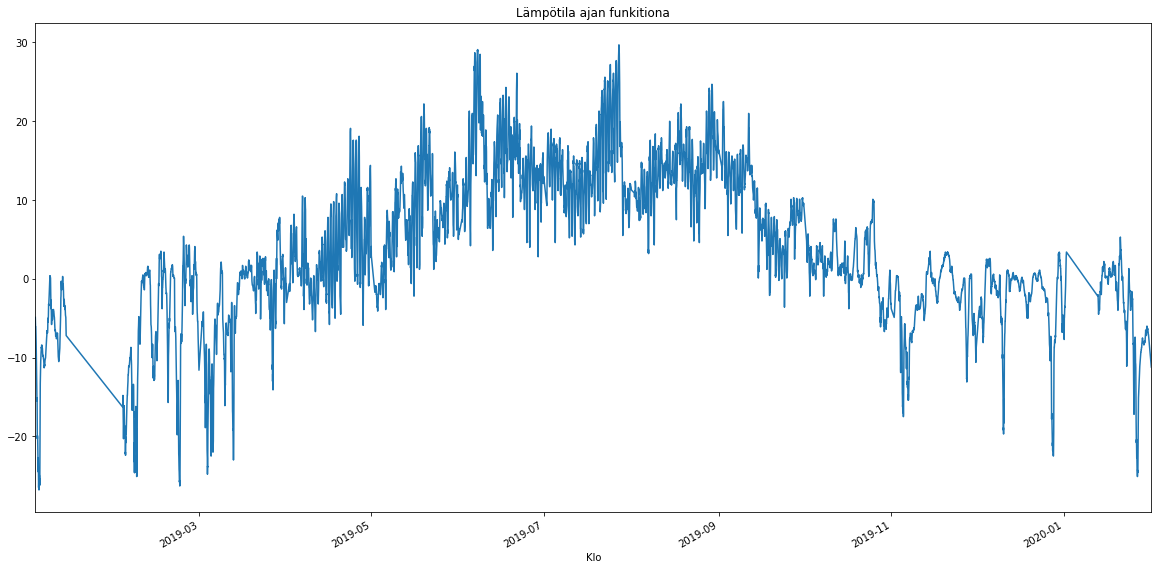

In [70]:
merged.lämpötila.plot(title='Lämpötila ajan funkitiona')
plt.show()